In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
#Data Pre-processing
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gjrah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gjrah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [7]:
#To identify stopwords
from nltk.corpus import stopwords
#To find the root word
from nltk.stem import PorterStemmer
#Tokenization
from nltk.tokenize import sent_tokenize,word_tokenize
#Regualr Expression
import re
#Collections
from collections import Counter
#For Visualization
from wordcloud import WordCloud
#Encoding
from sklearn.preprocessing import LabelEncoder

In [12]:
#Model Building
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [15]:
# Importing the Dataset
df = pd.read_csv('spam.csv',encoding='latin1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1582,ham,"Yep, at derek's house now, see you Sunday &lt;3",NaN,NaN,NaN
3231,ham,Guess he wants alone time. We could just show ...,NaN,NaN,NaN
452,ham,K:)k:)what are detail you want to transfer?acc...,NaN,NaN,NaN
2959,ham,Sir send to group mail check it.,NaN,NaN,NaN
4575,spam,Congratulations ur awarded 500 of CD vouchers ...,NaN,NaN,NaN


### Documentation:
* I encountered the following error: <i> UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 135-136: invalid continuation byte </i>

* Resolved with <i>latin1</i>


### Observation:
### Learning from our dataset
* We have 5 columns in our dataset
* ham : Messages which aren't spam
* spam : Messages which are spam
ham and spam are just conventions used.
* We have the message classification column as v1 and messages in column as v2
* We have 3 columns with <b>NaN values</b> 

In [18]:
#Initial Exploration
print(df.shape)
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
df

(5572, 5)


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


* We have dropped the three columns having <b>NaN Values</b> which aren't necessary for our data analysis

In [19]:
#Checking for null values
df.isnull().sum()

v1    0
v2    0
dtype: int64

* There are no null values

In [20]:
#Checking for the duplicate
df.duplicated().sum()

403

- There are around 403 duplicate values
- Let's remove them

In [21]:
#Removing the duplicates across all the columns
df = df.drop_duplicates(keep='first')

In [22]:
df.shape

(5169, 2)

- Before we had 5572 rows × 2 columns
- Now after deleting the duplicates, we have 5169 rows x 2 columns

In [23]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df.rename(columns={'v1':'results','v2':'emails'},inplace=True)

C:\Users\gjrah\AppData\Local\Temp\ipykernel_7340\3964741389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1':'results','v2':'emails'},inplace=True)


In [26]:
df.sample(5)

,results,emails
2510,ham,Yunny i'm walking in citylink now Ì_ faster co...
4131,ham,Hi baby ive just got back from work and i was ...
3089,ham,Am going to take bath ill place the key in win...
3048,ham,Lol they don't know about my awesome phone. I ...
4644,ham,Are you planning to come chennai?


### Exploratory Data Analysis

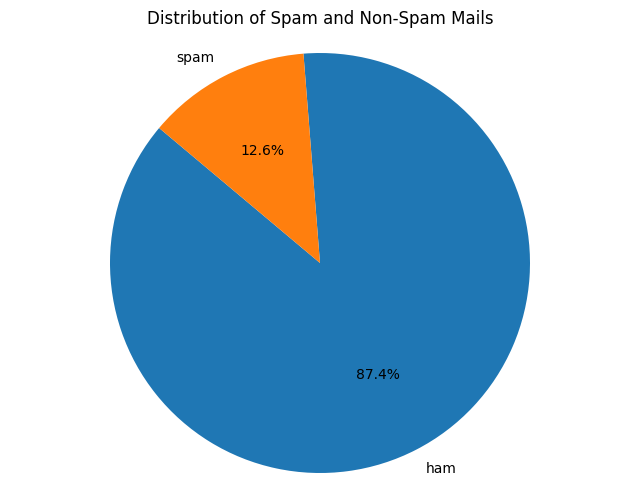

In [28]:
df['results'].value_counts()

#Plotting
plt.figure(figsize=(8,6))
plt.pie(df['results'].value_counts(),labels=df['results'].value_counts().index, autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Spam and Non-Spam Mails')
plt.axis('equal')
plt.show()

#Count the length of the email ids
df['Length'] = df['emails'].apply(len)
#Calculate the number of words in email
df['num_words'] = df['emails'].apply(word_tokenize).apply(len)
#Calculate the number of sent in email
df['num_sent'] = df['emails'].apply(sent_tokenize).apply(len)

df.head(2)

In [32]:
#Calculating avg length spam
avg_length_spam = df[df['results']=='spam']['Length'].mean()
#Calculating avg length of Ham
avg_length_ham = df[df['results']=='ham']['Length'].mean()

print("Average Length of Spam Emails:",avg_length_spam)
print("Average Length of Ham Emails:",avg_length_ham)

Average Length of Spam Emails: 137.89127105666157
Average Length of Ham Emails: 70.45925597874225


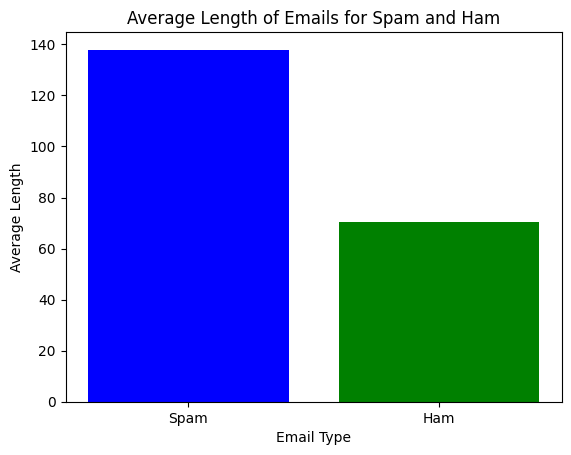

In [33]:
#Plotting
plt.bar(['Spam','Ham'],[avg_length_spam,avg_length_ham],color=['Blue','green'])
plt.title("Average Length of Emails for Spam and Ham")
plt.xlabel('Email Type')
plt.ylabel('Average Length')
plt.show()

### Observation
- Length of Spam is higher than Length of Ham
- Thus, we can conclude that spam messages are more detailed and lengthy compared to Ham

In [37]:
avg_sent_spam = df[df['results']=='spam']['num_sent'].mean()
avg_sent_ham = df[df['results']=='ham']['num_sent'].mean()

print("Average Sentence in Spam Emails:",avg_sent_spam)
print("Average Sentence in Ham Emails:",avg_sent_ham)

Average Sentence in Spam Emails: 2.970903522205207
Average Sentence in Ham Emails: 1.8201948627103632


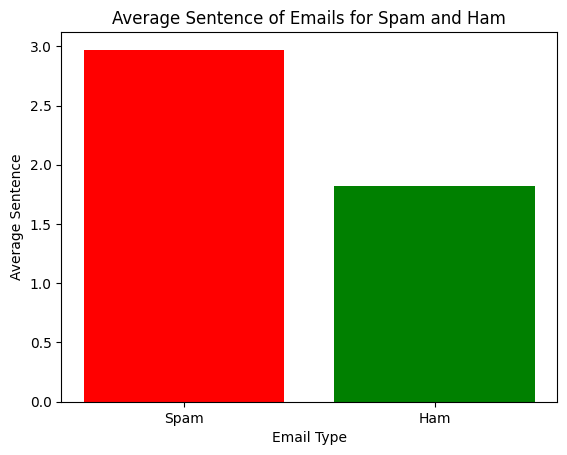

In [39]:
#plotting the graphs
plt.bar(['Spam','Ham'],[avg_sent_spam,avg_sent_ham],color=['Red','Green'])
plt.title("Average Sentence of Emails for Spam and Ham")
plt.xlabel("Email Type")
plt.ylabel("Average Sentence")
plt.show()

### Observation
- The spam messages are generally lengthy, while ham are generally short and concise

### Relationship between Length and Spam
* We are trying to co-relate the length and spam results

In [43]:
correlation = df['Length'].corr((df['results']=='spam').astype(int))
print('Correlation between email length and spam classification:',correlation)

Correlation between email length and spam classification: 0.38471706671430644


### What are we trying to do ?
- First, we are trying to find the number of spam messages in the results using `corr`
- The `corr` returns boolean value `True` or `False`
- `astype(int)` converts the correlation data to integer

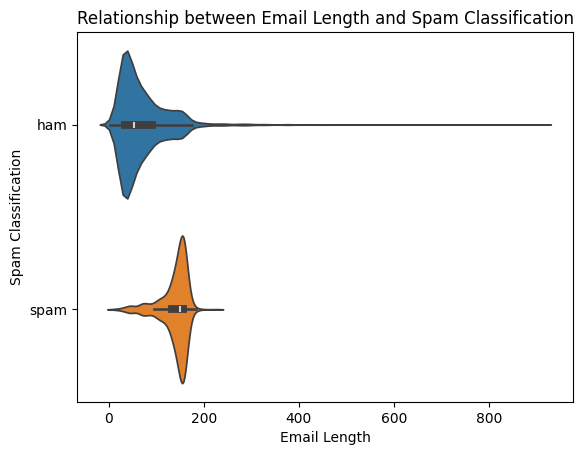

In [48]:
sns.violinplot(data=df,x='Length',y='results',hue='results')
plt.xlabel('Email Length')
plt.ylabel('Spam Classification')
plt.title('Relationship between Email Length and Spam Classification')
plt.show()

In [52]:
correlation_matrix = df[['Length','num_words','num_sent']].corr()
print("The relationship between Features are \n",correlation_matrix)

The relationship between Features are 
              Length  num_words  num_sent
Length     1.000000   0.965760  0.624139
num_words  0.965760   1.000000  0.679971
num_sent   0.624139   0.679971  1.000000


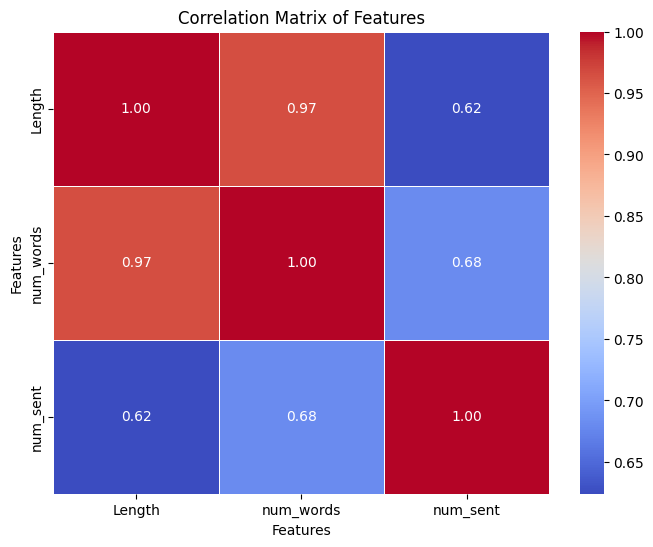

In [53]:
#Visualize the correlation matrix using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

* The correlation matrix indicates strong positive correlations between email length and the number of words (0.97) as well as between the number of words and the number of sentences (0.68).
  
* This suggests that longer emails tend to have more words, and emails with more words tend to have more sentences.

* However, the correlation between email length and the number of sentences is weaker (0.62).

* This implies that while longer emails may have more sentences, the relationship is not as strong as with the number of words.

* Understanding these relationships helps us grasp how different features contribute to the overall structure and content of emails, aiding in spam classification.

### Data Preprocessing

In [88]:
#Transforming the text to lowercase
df.loc[:, 'transform_text'] = df['emails'].str.lower()

df.loc[:, 'transform_text'] = df['transform_text'].apply(word_tokenize)


In [89]:
#Removing special characters
df.loc[:, 'transform_text'] = df['transform_text'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])

In [90]:
#Removing the stop words and punctuation
stop_words = set(stopwords.words('english'))
df.loc[:, 'transform_text'] = df['transform_text'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])

In [91]:
#Stemming
ps = PorterStemmer()
# Stemming (only if there are words left)
df.loc[:, 'transform_text'] = df['transform_text'].apply(lambda x: [ps.stem(word) for word in x if word])  # Filter out empty strings

# Convert the preprocessed text back to string
df.loc[:, 'transform_text'] = df['transform_text'].apply(lambda x: ' '.join(x))  # Use space to join words

In [92]:
#Display the preprocessed data
print(df[['emails', 'transform_text']].head())

                                              emails  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                      transform_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3                u dun say earli hor u c alreadi say  
4            nah nt think goe usf live around though  


In [93]:
spam_emails = df[df['results'] == 'spam']['transform_text']
#Tokenize the text in spam emails
spam_words = ' '.join(spam_emails).split()
#Count occurrences of each word
word_counts = Counter(spam_words)
#Find the most common words
most_common_words = word_counts.most_common(10)
print("Top 10 Most Common Words in Spam Mails:")
for word,count in most_common_words:
    print(f"{word}:{count} occurences")

Top 10 Most Common Words in Spam Mails:
call:321 occurences
free:191 occurences
2:157 occurences
txt:141 occurences
u:135 occurences
text:122 occurences
ur:119 occurences
mobil:114 occurences
stop:106 occurences
repli:103 occurences


In [94]:
#generate word cloud
wordcloud = WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(dict(most_common_words))

### Most Common Words in Spam Emails

Top 10 Most Common Words in Spam Emails:
call: 321 occurrences
free: 191 occurrences
2: 157 occurrences
txt: 141 occurrences
u: 135 occurrences
text: 122 occurrences
ur: 119 occurrences
mobil: 114 occurrences
stop: 106 occurrences
repli: 103 occurrences


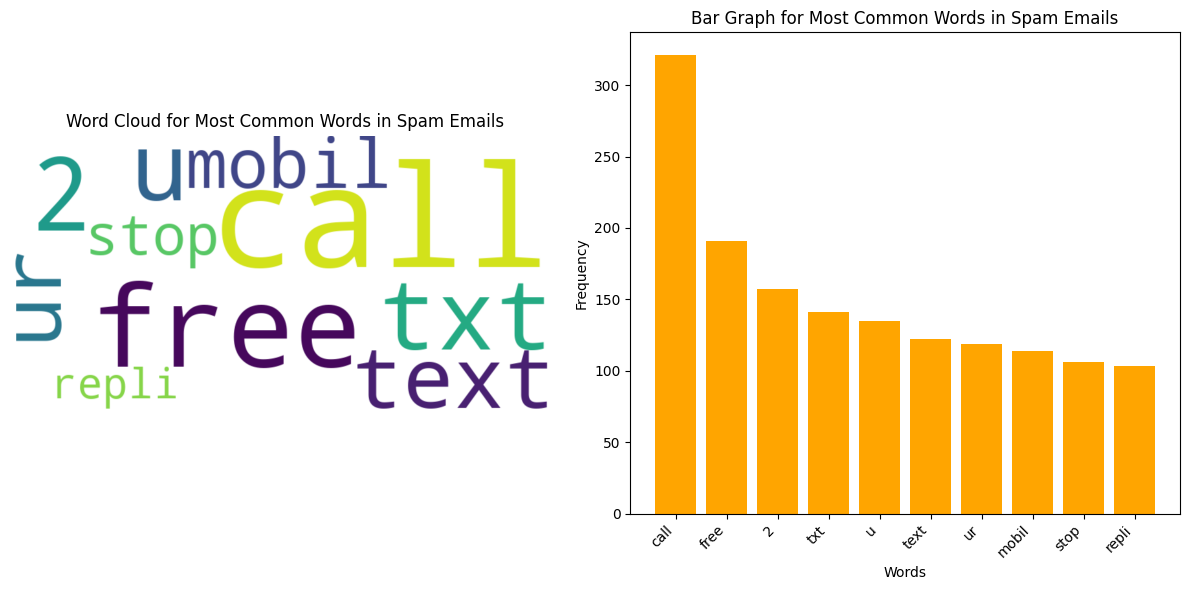

In [95]:
spam_emails = df[df['results'] == 'spam']['transform_text']
# Tokenize the text in spam emails
spam_words = ' '.join(spam_emails).split()
# Count occurrences of each word
word_counts = Counter(spam_words)
# Find the most common words
most_common_words = word_counts.most_common(10)
print("Top 10 Most Common Words in Spam Emails:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")
    # Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))
# Plot Word Cloud
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Most Common Words in Spam Emails')
plt.axis('off')
# Plot Bar Graph
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Bar Graph for Most Common Words in Spam Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Most Common Words in Ham Emails

In [97]:
ham_emails = df[df['results'] == 'ham']['transform_text']
#Tokenize the text in spam emails
ham_words = ' '.join(ham_emails).split()
#Count occurrences of each word
word_counts = Counter(ham_words)
#Find the most common words
most_common_words = word_counts.most_common(10)
print("Top Most 10 Common Words in Ham Emails:")
for word,count in most_common_words:
    print(f"{word}:{count} occurrences")

Top Most 10 Common Words in Ham Emails:
u:904 occurrences
go:404 occurrences
nt:352 occurrences
get:352 occurrences
2:290 occurrences
gt:288 occurrences
lt:287 occurrences
come:275 occurrences
ok:251 occurrences
got:238 occurrences


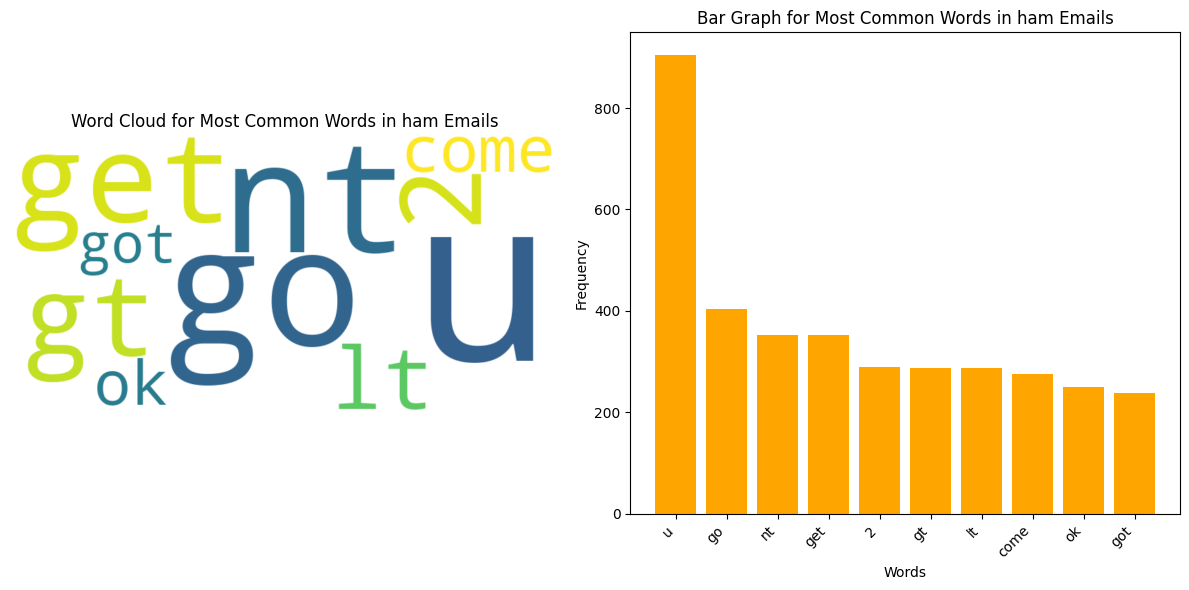

In [101]:
#Word Cloud
wordcloud = WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(dict(most_common_words))

#Plot Word Cloud
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Word Cloud for Most Common Words in ham Emails')
plt.axis('off')

#Plot Bar Graph
plt.subplot(1,2,2)
words,counts = zip(*most_common_words)
plt.bar(words,counts,color='orange')
plt.title('Bar Graph for Most Common Words in ham Emails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

### Preparing Data for Machine Learning

In [105]:
#Encoding 
encoder = LabelEncoder()
df.loc[:,'results'] = encoder.fit_transform(df['results'])
df.head(5)

,results,emails,Length,num_words,num_sent,transform_text,result
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,0
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,1
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though,0


- From the above table,we can tell the LabelEncoder has converted the results to numerical type.
- <b> 0 for True </b>
- <b> 1 for False</b>

In [110]:
#Data Splitting and vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['emails']).toarray()
y = df['results']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

### Building Machine Learning Model

In [118]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print(y_train.dtype)
print(y_test.dtype)

int32
int32


In [120]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_svc = svc_classifier.predict(X_test)
# print(y_pred_svc.dtype)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc:.2f}")
print("confusion Matrix :",confusion_matrix(y_test,y_pred_svc))
print("Precision Score: ",precision_score(y_test,y_pred_svc))

SVM Accuracy: 0.99
confusion Matrix : [[916   0]
 [ 14 104]]
Precision Score:  1.0


Results:
- Out of all the emails it tested, 916 were classified as non-spam emails
- 104 were classified as spam emails, and 14 were mis-classified as ham

In [123]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Confusion Matrix:",confusion_matrix(y_test,y_pred_rf))
print(f"Precision Score:",precision_score(y_test,y_pred_rf))

Random Forest Accuracy: 0.98
Confusion Matrix: [[915   1]
 [ 17 101]]
Precision Score: 0.9901960784313726


Results:
- 915 are marked as ham, 1 misclassified as spam
- 101 are marked as spam and 17 as ham

In [125]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test,y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print("Confusion Matrix",confusion_matrix(y_test,y_pred_nb))
print("Precision Score",precision_score(y_test,y_pred_nb))

Naive Bayes Accuracy: 0.9748549323017408
Confusion Matrix [[916   0]
 [ 26  92]]
Precision Score 1.0


Results:
- 916 are classified as ham
- 92 are classified as spam and 26 misclassified as ham

Choosing the best Classifier for `Email Spam Detection`

In [128]:
#Calculate the precision score
precision_score_nb = precision_score(y_test,y_pred_nb)
precision_score_svc = precision_score(y_test,y_pred_svc)
precision_score_rf = precision_score(y_test,y_pred_rf)

In [129]:
#Create list to store accuracies and precision scores
classifiers = ['SVC','Random Forest','Naive Bayes']
accuracies = [accuracy_svc,accuracy_rf,accuracy_nb]
precision_scores = [precision_score_svc,precision_score_rf,precision_score_nb]

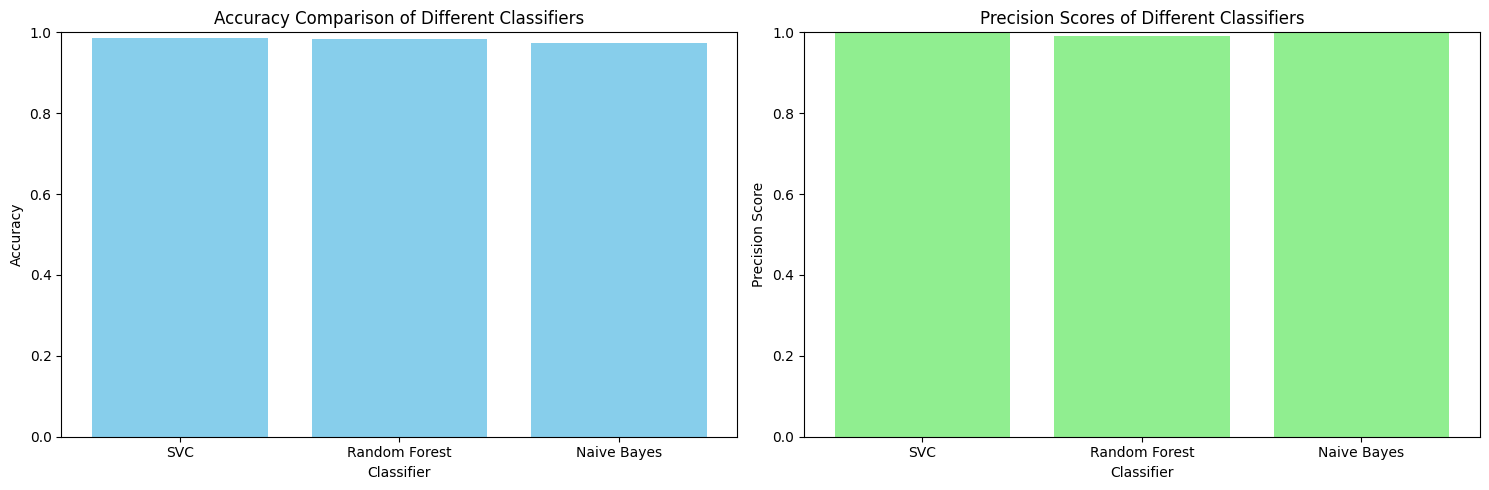

In [134]:
#Plot bar 
fig,axes = plt.subplots(1,2,figsize=(15,5))

axes[0].bar(classifiers,accuracies,color='skyblue')
axes[0].set_xlabel('Classifier')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison of Different Classifiers')
axes[0].set_ylim(0,1)

axes[1].bar(classifiers,precision_scores,color='lightgreen')
axes[1].set_xlabel('Classifier')
axes[1].set_ylabel('Precision Score')
axes[1].set_title('Precision Scores of Different Classifiers')
axes[1].set_ylim(0,1)
plt.tight_layout()
plt.show()

- From the graph, we can suggest that the SVC is the best predicting model

### Predict with new data

In [136]:
new_emails = [
    "Get a free iPhone now!",
    "Hey, how's it going?",
    "Congratulations! You've won a prize!",
    "Reminder: Meeting at 2 PM tomorrow."
]

#Convert new data into numerical vectors using the trained tfidf_vectorize
new_X = tfidf.transform(new_emails)
new_X_dense = new_X.toarray()

svm_predict = svc_classifier.predict(new_X_dense)

In [137]:
for email,prediction in zip(new_emails,svm_predict):
    if prediction == 1:
        print(f"'{email}' is predicted as spam")
    else:
        print(f"'{email}' is predicted as ham")

'Get a free iPhone now!' is predicted as ham
'Hey, how's it going?' is predicted as ham
'Congratulations! You've won a prize!' is predicted as spam
'Reminder: Meeting at 2 PM tomorrow.' is predicted as ham


Analysis:
Except the first email message, rest of the email messages are correctly classified